# Multiple choice version 2 results

The results come in multiple dataframes, one from each GPU. First load and combine them.

In [1]:
import glob
import pandas as pd
import numpy as np
from collections import Counter
import math
import ast
from tqdm.notebook import tqdm
import operator
import matplotlib.pyplot as plt

In [2]:
def eval_MC_results_MV(models,tasks):
    scores = {}
    topn = [1,3,5,10,50,100,500,1000]
    print("%8s | %5s |" %("Model","Task"), end="")
    for i in topn:
            print("%6d |" %(i), end="")
    print("")
    
    for model in models:
        for task in tasks:

            dfs = []
            path = "/scratch/s190619/Data_etc/ColBERT/MC_eval_data/from_retrievals/Version3/"
            for file in glob.glob(path + model + "/" + model + "_" + task + "_results_V2_*.csv"):
                #print(file)
                dfs.append(pd.read_csv(file).drop("Unnamed: 0",axis=1))

            df = dfs[0]
            for i in range(1,len(dfs)):
                df = df.append(dfs[i])
            df = df.sort_values(by="index").set_index("index")
            tmp2 = []

            for k in range(math.floor(df.shape[0]/1000)):
                tmp = []
            #     for i in range(1,6):
            #         tmp.append(round(Counter(df["predicted_option"].iloc[k*1000:(k+1)*1000])[i]/1000,3))
                for n in topn:
                    tmp.append(round(Counter(df["predicted_option"].iloc[k*1000:(k*1000+n)])[1]/n,3))

                tmp2.append(tmp)
                #print(tmp)
                performance = []
            for n in range(len(topn)):
                performance.append(round(sum([tmp2[i][n] for i in range(len(tmp2))])/len(tmp2),3))
            print("%8s | %5s |" %(model,task),end=" ")
            for x in performance:
                print("%.3f |" %x, end=" ")
            print("")
            scores[model + " | " + task] = performance
    return scores

In [3]:
def eval_MC_results_HOS(models,tasks):
    
    scores = {}
    topn = [1,3,5,10,50,100,500,1000]
    print("%8s | %5s |" %("Model","Task"), end="")
    for i in topn:
            print("%6d |" %(i), end="")
    print("")
    
    for model in models:
        for task in tasks:

            dfs = []
            path = "/scratch/s190619/Data_etc/ColBERT/MC_eval_data/from_retrievals/Version3/"
            for file in glob.glob(path + model + "/" + model + "_" + task + "_results_V2_*.csv"):
                #print(file)
                dfs.append(pd.read_csv(file).drop("Unnamed: 0",axis=1))

            df = dfs[0]
            for i in range(1,len(dfs)):
                df = df.append(dfs[i])
            df = df.sort_values(by="index").set_index("index")
            df["scores"] = df["scores"].apply(lambda x: ast.literal_eval(x))
            tmp2 = []
            
            topn = [1,3,5,10,50,100,500,1000]
            performance = []
            tmp2 = []
            
            for k in range(math.floor(df.shape[0]/1000)):
                tmp = []
                opts = {1 : 0,
                        2 : 0,
                        3 : 0,
                        4 : 0,
                        5 : 0}
                
#                 for n in topn:
#                     for j in range(1,6):
# #                         print(df["scores"].head())
# #                         print(df["scores"].iloc[k:(1+k)*n].head())
# #                         print([x[j-1] for x in df["scores"].iloc[k:(1+k)*n]])
                        
#                         opts[j] = sum([x[j-1] for x in df["scores"].iloc[k:(1+k)*n]])
#                         tmp.append(max(opts.items(), key=operator.itemgetter(1))[0])
                        
#                 print(scores_array)
#                 break
                
                for i in range(1000):
                    for j in range(1,6):
                        opts[j] = opts[j] + df["scores"].iloc[i+k*1000][j-1]
                    if i + 1 in topn:
                        tmp.append(max(opts.items(), key=operator.itemgetter(1))[0])
                tmp2.append(tmp)

            for i in range(len(topn)):
                performance.append(round(Counter([tmp2[j][i] for j in range(len(tmp2))])[1]/len(tmp2),3))
            print("%8s | %5s |" %(model,task),end=" ")
            for x in performance:
                print("%.3f |" %x, end=" ")
            print("")
            scores[model + " | " + task] = performance
    return scores

In [133]:
%%time
models = ["Model1_2","Model4_2","Model5","Model6_1"]
scores1 = eval_MC_results_MV(models)
print("")
scores2 = eval_MC_results_HOS(models)

   Model |  Task |     1 |     3 |     5 |    10 |    50 |   100 |   500 |  1000 |
Model1_2 | MedQA | 0.175 | 0.179 | 0.184 | 0.191 | 0.194 | 0.190 | 0.185 | 0.184 | 
Model1_2 |    FZ | 0.160 | 0.165 | 0.177 | 0.188 | 0.189 | 0.191 | 0.188 | 0.188 | 
Model4_2 | MedQA | 0.167 | 0.186 | 0.191 | 0.196 | 0.190 | 0.187 | 0.186 | 0.186 | 
Model4_2 |    FZ | 0.183 | 0.198 | 0.195 | 0.195 | 0.188 | 0.188 | 0.186 | 0.186 | 
  Model5 | MedQA | 0.162 | 0.177 | 0.190 | 0.201 | 0.209 | 0.206 | 0.193 | 0.192 | 
  Model5 |    FZ | 0.148 | 0.177 | 0.188 | 0.198 | 0.204 | 0.204 | 0.194 | 0.196 | 
Model6_1 | MedQA | 0.174 | 0.192 | 0.201 | 0.208 | 0.206 | 0.203 | 0.198 | 0.197 | 
Model6_1 |    FZ | 0.165 | 0.187 | 0.201 | 0.204 | 0.202 | 0.203 | 0.200 | 0.200 | 

   Model |  Task |     1 |     3 |     5 |    10 |    50 |   100 |   500 |  1000 |
Model1_2 | MedQA | 0.175 | 0.161 | 0.187 | 0.192 | 0.205 | 0.193 | 0.182 | 0.182 | 
Model1_2 |    FZ | 0.160 | 0.178 | 0.183 | 0.196 | 0.201 | 0.201 | 0.193 | 0.

In [4]:
%%time
tasks = ["MedQA","FZ"]
models = ["Model1_2","Model4_2","Model5","Model6_1","Model7_1","Model8","Model9_1","Model10_1"]
scores1 = eval_MC_results_MV(models, tasks)
print("")
scores2 = eval_MC_results_HOS(models, tasks)

   Model |  Task |     1 |     3 |     5 |    10 |    50 |   100 |   500 |  1000 |
Model1_2 | MedQA | 0.193 | 0.188 | 0.191 | 0.195 | 0.198 | 0.196 | 0.194 | 0.193 | 
Model1_2 |    FZ | 0.214 | 0.187 | 0.196 | 0.196 | 0.192 | 0.190 | 0.188 | 0.188 | 
Model4_2 | MedQA | 0.195 | 0.204 | 0.202 | 0.198 | 0.194 | 0.192 | 0.188 | 0.189 | 
Model4_2 |    FZ | 0.249 | 0.211 | 0.197 | 0.198 | 0.182 | 0.183 | 0.181 | 0.182 | 
  Model5 | MedQA | 0.184 | 0.189 | 0.188 | 0.189 | 0.196 | 0.194 | 0.188 | 0.189 | 
  Model5 |    FZ | 0.158 | 0.180 | 0.174 | 0.173 | 0.176 | 0.175 | 0.173 | 0.175 | 
Model6_1 | MedQA | 0.225 | 0.210 | 0.212 | 0.208 | 0.207 | 0.207 | 0.200 | 0.201 | 
Model6_1 |    FZ | 0.211 | 0.209 | 0.208 | 0.202 | 0.200 | 0.197 | 0.191 | 0.191 | 
Model7_1 | MedQA | 0.200 | 0.194 | 0.205 | 0.202 | 0.202 | 0.200 | 0.191 | 0.191 | 
Model7_1 |    FZ | 0.186 | 0.189 | 0.185 | 0.185 | 0.192 | 0.193 | 0.185 | 0.186 | 
  Model8 | MedQA | 0.225 | 0.217 | 0.222 | 0.220 | 0.213 | 0.211 | 0.209 | 0.

### Random guessing

In [5]:
def get_percentiles(scores):
    percentiles = []
    scores = np.array(scores)
    for frac in [5, 25, 50, 75, 95]:
        percentiles.append(np.percentile(scores,frac))
    return percentiles

In [6]:
def random_guessing(num_queries, task):

    tmp2 = []
    for _ in tqdm(range(10000)):
        rand_guess = np.random.randint(1,6,size=num_queries)
        tmp = []
        for i in range(1,6):
            tmp.append(Counter(rand_guess)[i]/num_queries)
        tmp2.append(tmp)

    boxplot_list = []
    for i in range(5):
        boxplot_list.append([x[i] for x in tmp2])

    plt.boxplot(boxplot_list,showfliers=False)
    plt.title("Distribution of random guessing on task %s" %task)
    
    plt.show()
    
    return get_percentiles(boxplot_list[0])

  0%|          | 0/10000 [00:00<?, ?it/s]

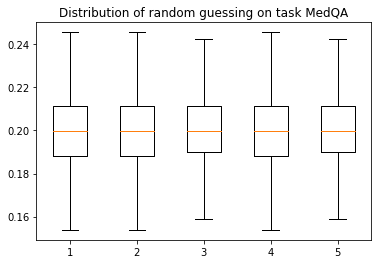

In [7]:
num_queries = pd.read_csv("/scratch/s190619/Data_etc/MedQA/disorders_table_dev-test.csv").shape[0]
random_guessingMedQA = random_guessing(num_queries,"MedQA")

  0%|          | 0/10000 [00:00<?, ?it/s]

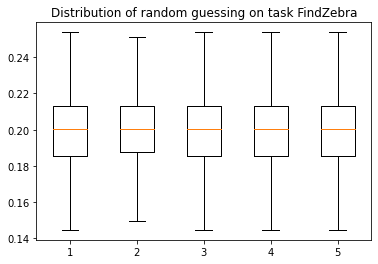

In [8]:
num_queries = pd.read_csv("/scratch/s190619/Data_etc/MedQA/disorders_table_dev-test_RARE_FZ.csv").shape[0]
random_guessingFZ = random_guessing(num_queries,"FindZebra")

In [9]:
def plot_MC_eval(use_list1, use_list2, random_guessing, task, desc, line_markers = None):
    
    if line_markers == None:
        line_markers = ["None"]*len(use_list1)
    
    x_axis = [1,3,5,10,50,100,500,1000]
    x_axis = [str(x) for x in x_axis]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7),sharey=True)
    
    SMALL_SIZE = 12
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 20

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    k=0
    for key in [x for x in use_list1.keys() if task in x]:

        axes[0].plot(x_axis,[random_guessing[0]]*len(x_axis),color='grey',linewidth=1, linestyle=':', label='_nolegend_')
        axes[0].plot(x_axis,[random_guessing[4]]*len(x_axis),color='grey',linewidth=1, linestyle=':', label='_nolegend_')

        axes[0].plot(x_axis,[random_guessing[1]]*len(x_axis),color='grey',linewidth=1, linestyle='--', label='_nolegend_')
        axes[0].plot(x_axis,[random_guessing[3]]*len(x_axis),color='grey',linewidth=1, linestyle='--', label='_nolegend_')

        axes[0].plot(x_axis,[random_guessing[2]]*len(x_axis),color='grey',linewidth=1, linestyle='-', label='_nolegend_')

        axes[0].plot(x_axis,use_list1[key], marker=line_markers[k])
        k+=1
    
    k=0
    for key in [x for x in use_list2.keys() if task in x]:

        axes[1].plot(x_axis,[random_guessing[0]]*len(x_axis),color='grey',linewidth=1, linestyle=':', label='_nolegend_')
        axes[1].plot(x_axis,[random_guessing[4]]*len(x_axis),color='grey',linewidth=1, linestyle=':', label='_nolegend_')

        axes[1].plot(x_axis,[random_guessing[1]]*len(x_axis),color='grey',linewidth=1, linestyle='--', label='_nolegend_')
        axes[1].plot(x_axis,[random_guessing[3]]*len(x_axis),color='grey',linewidth=1, linestyle='--', label='_nolegend_')

        axes[1].plot(x_axis,[random_guessing[2]]*len(x_axis),color='grey',linewidth=1, linestyle='-', label='_nolegend_')
        
        axes[1].plot(x_axis,use_list2[key], marker=line_markers[k])
        k+=1

    axes[0].set_title("Majority Vote (MV)")
    axes[1].set_title("Highest Overall Score (HOS)")
    #axes[0].legend([x.replace(" | MedQA","") for x in use_list.keys() if "MedQA" in x],loc="center right",bbox_to_anchor=(1.5, 0.5))
#     axes[1].legend([x.replace(" | FZ","") for x in use_list.keys() if "FZ" in x],loc="upper right",bbox_to_anchor=(1.6, 1))
    axes[1].legend(desc,loc="upper right",bbox_to_anchor=(2, 1),facecolor='white').set_alpha(None)
#     axes[1].legend(desc,loc="upper right",bbox_to_anchor=(1.25, 1),fancybox=True)
    
    axes[0].set_xlabel("Top n")
    axes[1].set_xlabel("Top n")
    axes[0].set_ylabel("MC accuracy")
    
    ax1 = axes[1].twinx()

    axes[0].set_ylim(0.14,0.27)
    axes[1].set_ylim(0.14,0.27)
    ax1.set_ylim(0.14,0.27)
    ax1.set_yticks(random_guessing)
    ax1.set_yticklabels(["5%","25%","50%","75%","95%"])
    ax1.set_ylabel("Percentiles of random guessing")
    


    fig.suptitle("Evalutation on the " + task + " task", fontsize=BIGGER_SIZE)

    fig.tight_layout()
    fig.savefig("/scratch/s190619/Data_etc/Figures/Performance_" + task + ".jpg")

In [12]:
desc = ["Model1: pretrained on MSMARCO small",
        "Model4: pretrained on MSMARCO medical",
        "Model5: Model4, finetuned with FZ triples",
        "Model6: Model4, finetuned with MedQA triples",
        "Model7: Model1, finetuned with FZ triples",
        "Model8: Model1, finetuned with MedQA triples",
        "Model9: Model4, finetuned with MedQA QA-triples",
        "Model10: Model4, finetuned with FZ QA-triples",]
line_markers = ["D","x","x","x","D","D","x","x"]

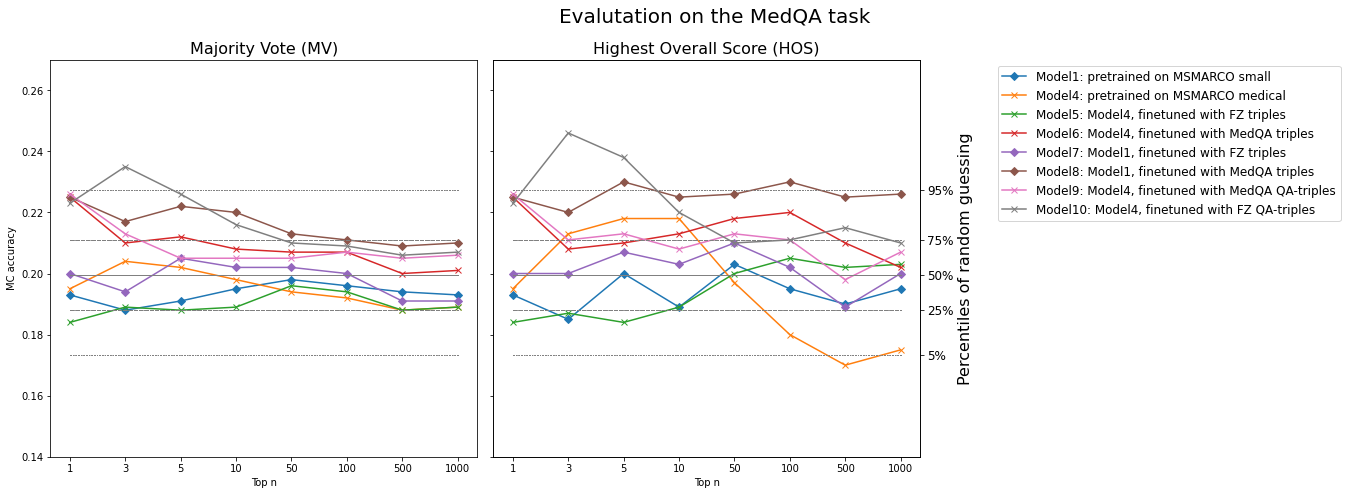

In [13]:
plot_MC_eval(scores1, scores2, random_guessingMedQA, "MedQA", desc, line_markers)

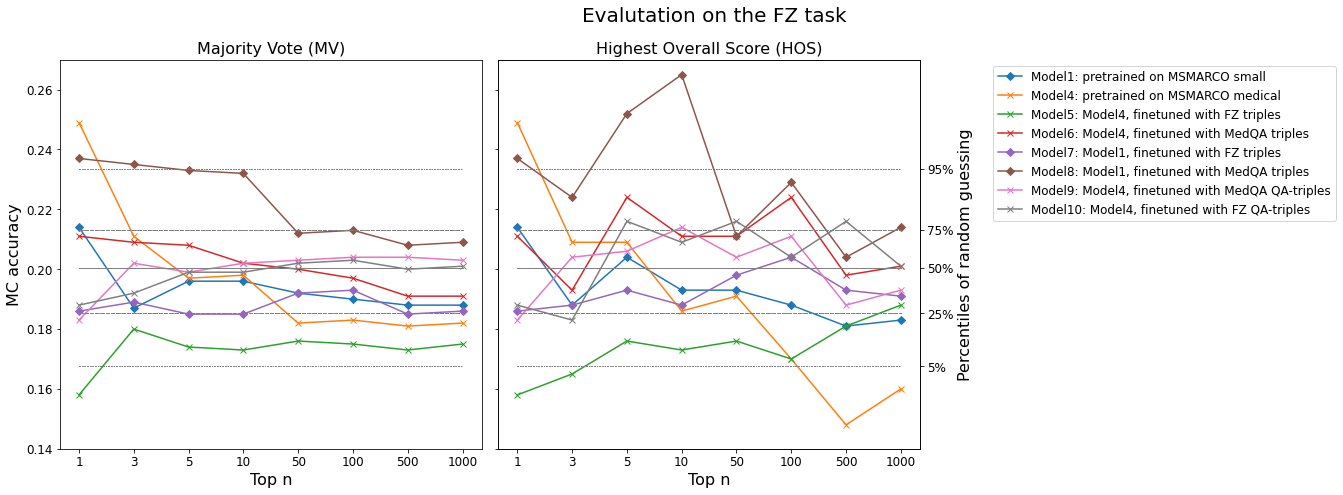

In [14]:
plot_MC_eval(scores1, scores2, random_guessingFZ, "FZ", desc, line_markers)

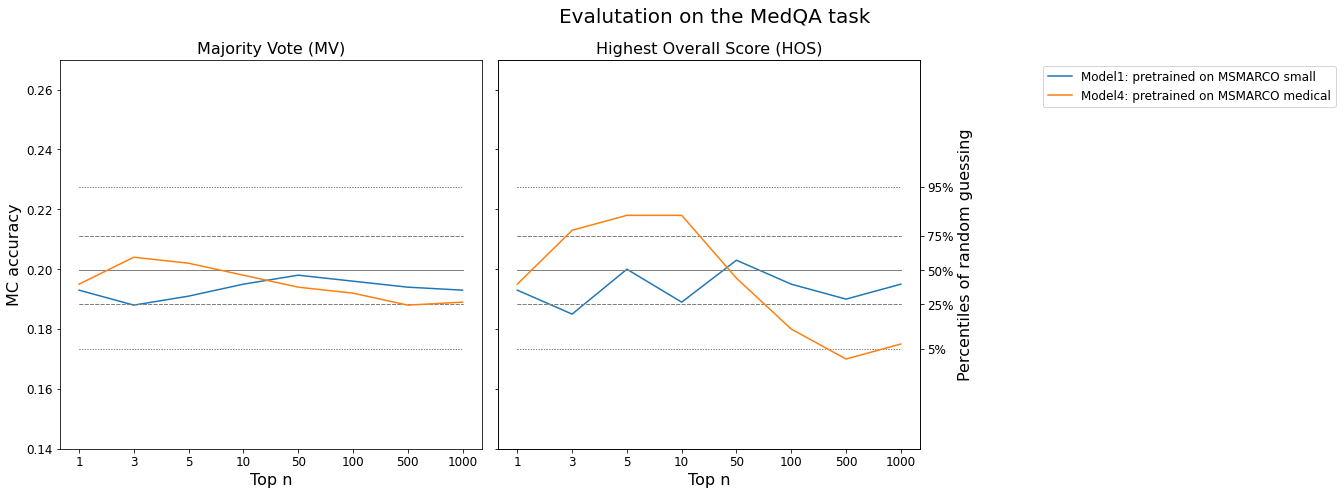

In [40]:
scores1_1_4 = {key: value for key, value in scores1.items() if "Model1_2" in key or "Model4_2" in key}
scores2_1_4 = {key: value for key, value in scores2.items() if "Model1_2" in key or "Model4_2" in key}
plot_MC_eval(scores1_1_4, scores2_1_4, random_guessingMedQA, "MedQA", desc)

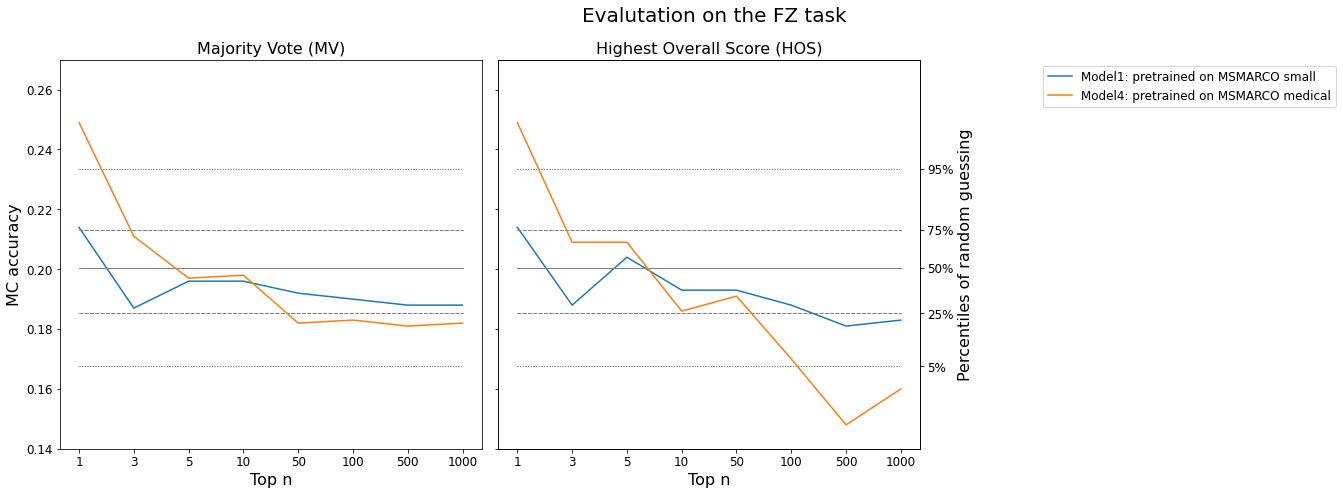

In [41]:
plot_MC_eval(scores1_1_4, scores2_1_4, random_guessingFZ, "FZ", desc)

394

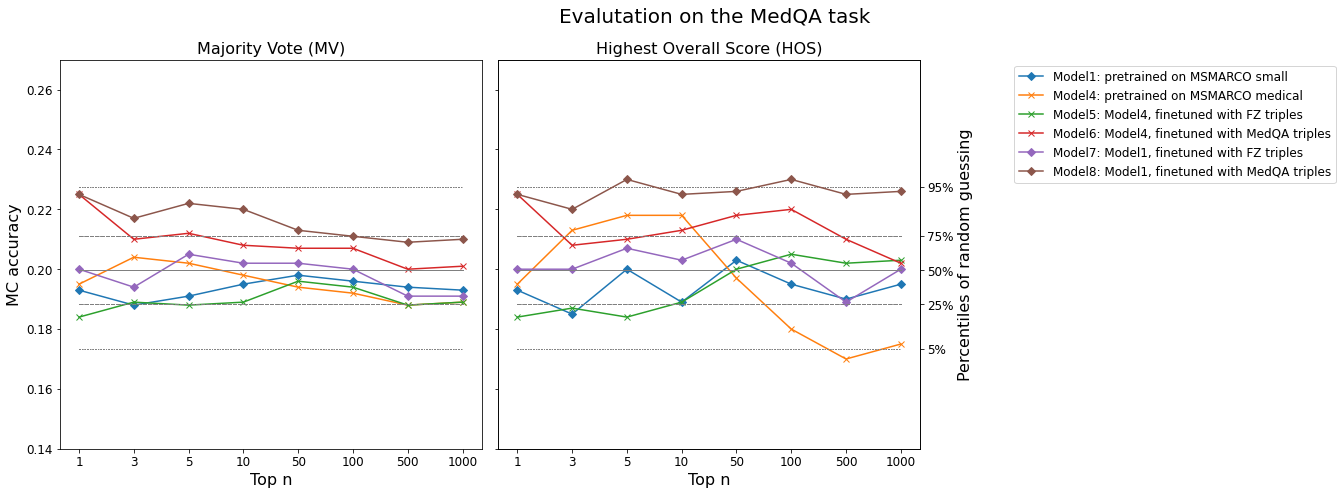

In [68]:
desc = ["Model1: pretrained on MSMARCO small",
        "Model4: pretrained on MSMARCO medical",
        "Model5: Model4, finetuned with FZ triples",
        "Model6: Model4, finetuned with MedQA triples",
        "Model7: Model1, finetuned with FZ triples",
        "Model8: Model1, finetuned with MedQA triples",]
line_markers = ["D","x","x","x","D","D"]

scores1_5_8 = {key: value for key, value in scores1.items() if "Model1_2" in key or "Model4_2" in key or "Model5" in key or "Model6_1" in key or "Model7_1" in key or "Model8" in key}
scores2_5_8 = {key: value for key, value in scores2.items() if "Model1_2" in key or "Model4_2" in key or "Model5" in key or "Model6_1" in key or "Model7_1" in key or "Model8" in key}
plot_MC_eval(scores1_5_8, scores2_5_8, random_guessingMedQA, "MedQA", desc, line_markers)

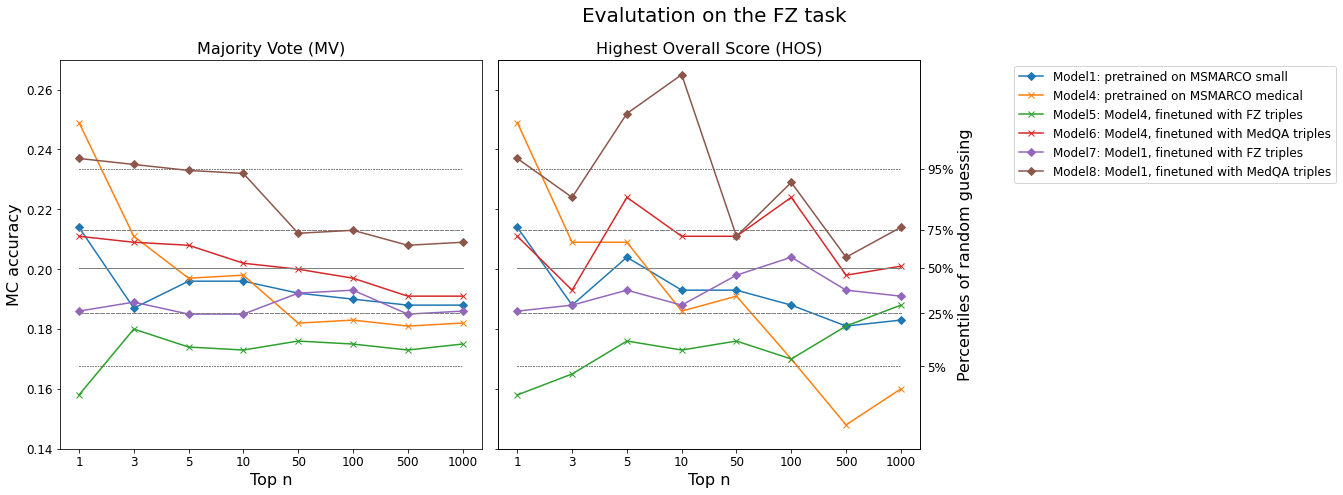

In [69]:
plot_MC_eval(scores1_5_8, scores2_5_8, random_guessingFZ, "FZ", desc, line_markers)

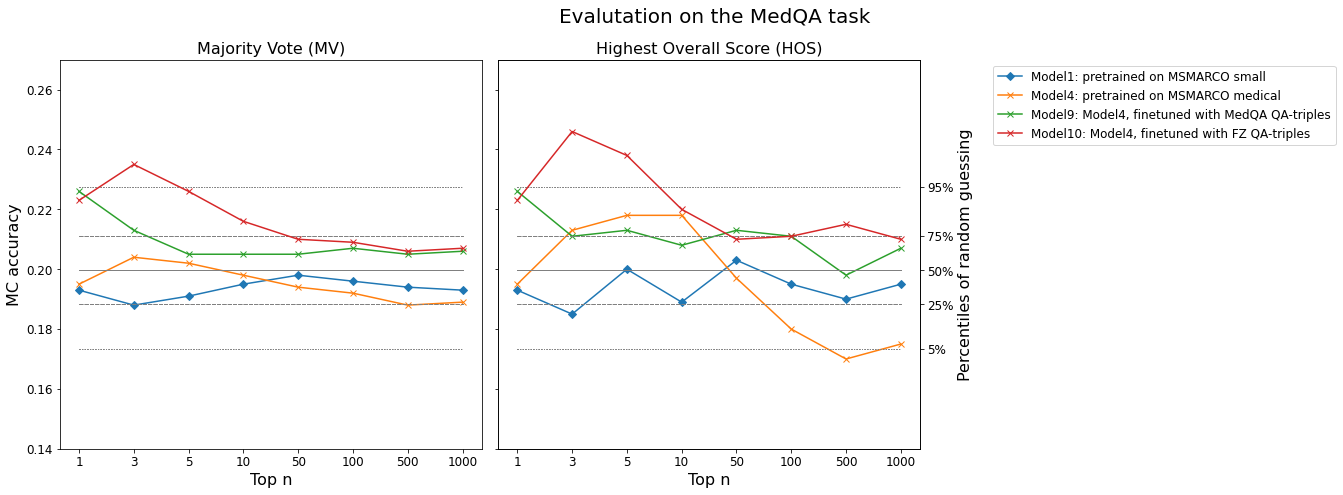

In [79]:
desc = ["Model1: pretrained on MSMARCO small",
        "Model4: pretrained on MSMARCO medical",
        "Model9: Model4, finetuned with MedQA QA-triples",
        "Model10: Model4, finetuned with FZ QA-triples"]
line_markers = ["D","x","x","x"]

scores1_9_10 = {key: value for key, value in scores1.items() if "Model1_2" in key or "Model4_2" in key or "Model9_1" in key or "Model10_1" in key}
scores2_9_10 = {key: value for key, value in scores2.items() if "Model1_2" in key or "Model4_2" in key or "Model9_1" in key or "Model10_1" in key}
plot_MC_eval(scores1_9_10, scores2_9_10, random_guessingMedQA, "MedQA", desc, line_markers)

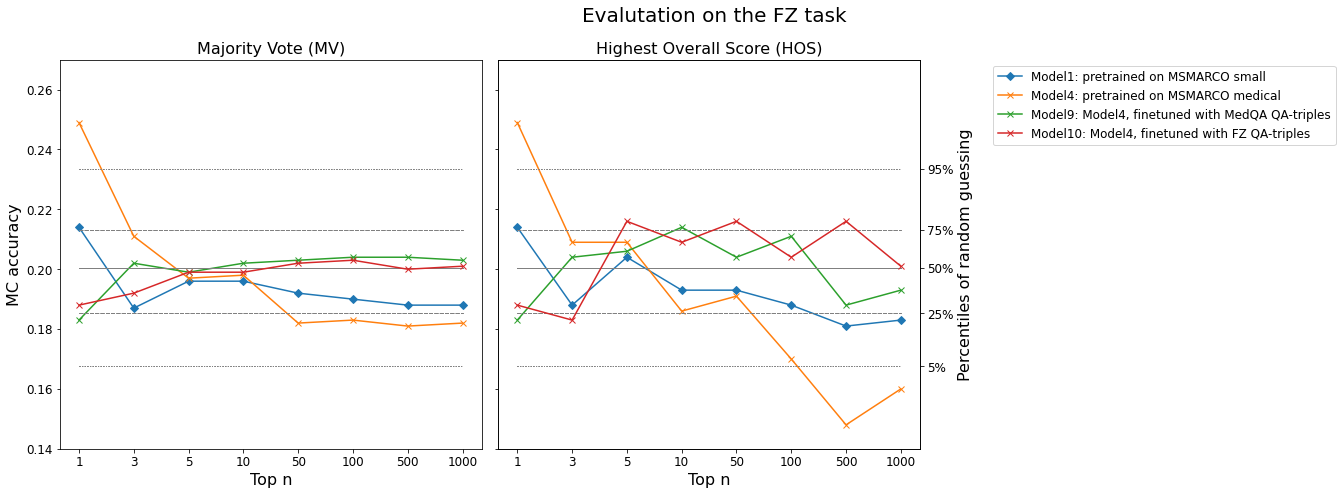

In [80]:
plot_MC_eval(scores1_9_10, scores2_9_10, random_guessingFZ, "FZ", desc, line_markers)

In [43]:
%%time
tasks = ["MedQA","FZ"]
models = ["Model5","Model5_Q","Model6_1","Model6_Q"]
scores_Q_1 = eval_MC_results_MV(models,tasks)
print("")
scores_Q_2 = eval_MC_results_HOS(models,tasks)

   Model |  Task |     1 |     3 |     5 |    10 |    50 |   100 |   500 |  1000 |
  Model5 | MedQA | 0.184 | 0.189 | 0.188 | 0.189 | 0.196 | 0.194 | 0.188 | 0.189 | 
  Model5 |    FZ | 0.158 | 0.180 | 0.174 | 0.173 | 0.176 | 0.175 | 0.173 | 0.175 | 
Model5_Q | MedQA | 0.182 | 0.191 | 0.186 | 0.186 | 0.183 | 0.181 | 0.174 | 0.177 | 
Model5_Q |    FZ | 0.158 | 0.172 | 0.168 | 0.171 | 0.173 | 0.173 | 0.165 | 0.168 | 
Model6_1 | MedQA | 0.225 | 0.210 | 0.212 | 0.208 | 0.207 | 0.207 | 0.200 | 0.201 | 
Model6_1 |    FZ | 0.211 | 0.209 | 0.208 | 0.202 | 0.200 | 0.197 | 0.191 | 0.191 | 
Model6_Q | MedQA | 0.210 | 0.200 | 0.200 | 0.203 | 0.191 | 0.191 | 0.185 | 0.189 | 
Model6_Q |    FZ | 0.196 | 0.198 | 0.195 | 0.193 | 0.182 | 0.180 | 0.175 | 0.179 | 

   Model |  Task |     1 |     3 |     5 |    10 |    50 |   100 |   500 |  1000 |
  Model5 | MedQA | 0.184 | 0.187 | 0.184 | 0.189 | 0.200 | 0.205 | 0.202 | 0.203 | 
  Model5 |    FZ | 0.158 | 0.165 | 0.176 | 0.173 | 0.176 | 0.170 | 0.181 | 0.

In [81]:
%%time
tasks = ["MedQA","FZ"]
models = ["Model9_1","Model9_1_TRAIN"]
scores_9_1 = eval_MC_results_MV(models,tasks)
print("")
scores_9_2 = eval_MC_results_HOS(models,tasks)

   Model |  Task |     1 |     3 |     5 |    10 |    50 |   100 |   500 |  1000 |
Model9_1 | MedQA | 0.226 | 0.213 | 0.205 | 0.205 | 0.205 | 0.207 | 0.205 | 0.206 | 
Model9_1 |    FZ | 0.183 | 0.202 | 0.199 | 0.202 | 0.203 | 0.204 | 0.204 | 0.203 | 
Model9_1_TRAIN | MedQA | 0.233 | 0.229 | 0.231 | 0.231 | 0.235 | 0.233 | 0.229 | 0.229 | 
Model9_1_TRAIN |    FZ | 0.213 | 0.214 | 0.223 | 0.228 | 0.233 | 0.233 | 0.229 | 0.229 | 

   Model |  Task |     1 |     3 |     5 |    10 |    50 |   100 |   500 |  1000 |
Model9_1 | MedQA | 0.226 | 0.211 | 0.213 | 0.208 | 0.213 | 0.211 | 0.198 | 0.207 | 
Model9_1 |    FZ | 0.183 | 0.204 | 0.206 | 0.214 | 0.204 | 0.211 | 0.188 | 0.193 | 
Model9_1_TRAIN | MedQA | 0.233 | 0.233 | 0.244 | 0.256 | 0.276 | 0.264 | 0.263 | 0.263 | 
Model9_1_TRAIN |    FZ | 0.213 | 0.233 | 0.255 | 0.269 | 0.259 | 0.257 | 0.262 | 0.261 | 
CPU times: user 7min 2s, sys: 6.15 s, total: 7min 8s
Wall time: 7min 8s


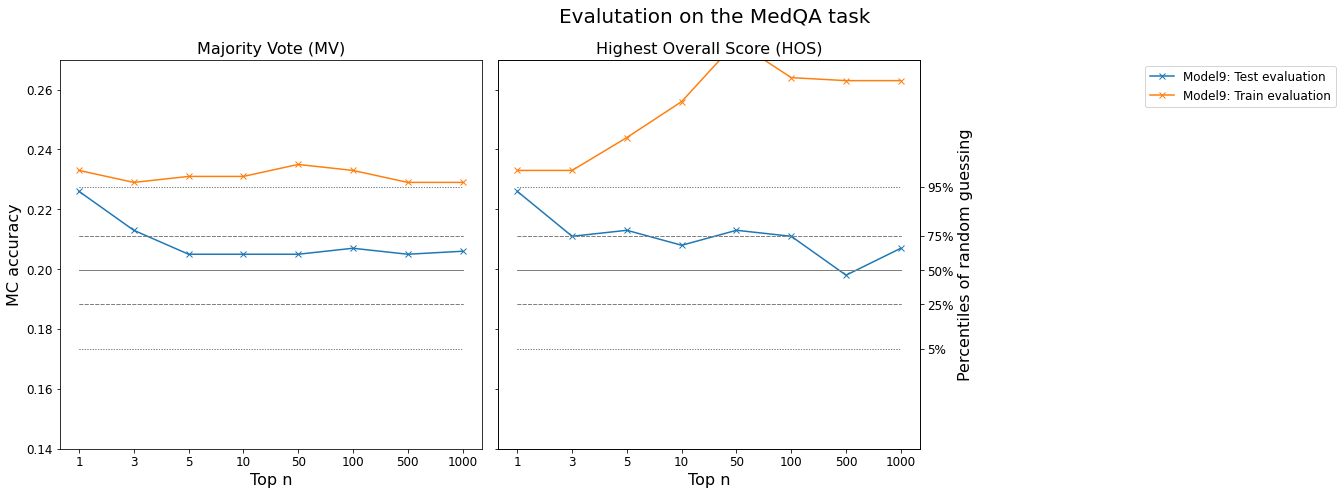

In [82]:
desc = ["Model9: Test evaluation",
        "Model9: Train evaluation",]
line_markers = ["x","x"]

# scores1_9_1 = {key: value for key, value in scores_9_1.items() if "Model1_2" in key or "Model4_2" in key or "Model9_1" in key or "Model10_1" in key}
# scores2_9_2 = {key: value for key, value in scores_9_2.items() if "Model1_2" in key or "Model4_2" in key or "Model9_1" in key or "Model10_1" in key}
plot_MC_eval(scores_9_1, scores_9_2, random_guessingMedQA, "MedQA", desc, line_markers)

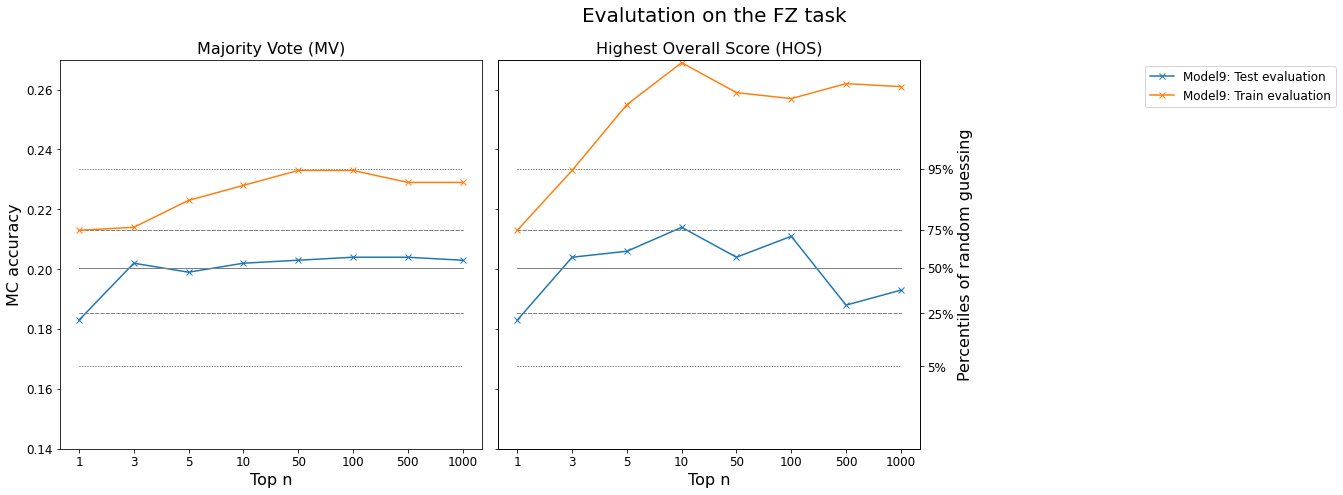

In [83]:
plot_MC_eval(scores_9_1, scores_9_2, random_guessingFZ, "FZ", desc, line_markers)